In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
import re
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [10]:
data  = pd.read_csv("IMDB Dataset.csv")
display(data.sample(10))
display(data.info())

,review,sentiment
1876,One of the worst movie I have seen in 2009 so ...,negative
41972,After reading all of the rave reviews about th...,negative
14086,This is one of the worst pieces of cinema I ha...,negative
25027,Although Super Mario 64 isn't like the rest of...,positive
4908,(Warning: May Contain Spoilers) Let Rosalina h...,positive
6311,this show is the best it is full of laughs and...,positive
45662,"This story of Ted Brice, an American pilot who...",negative
6657,I don't think most people give this movie as m...,positive
14074,Awesomely improbable and foolish potboiler tha...,negative
38929,St. Elmo's Fire has no bearing on life after u...,negative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


None

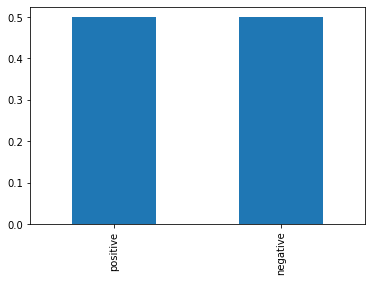

In [8]:
data.sentiment.value_counts(normalize=True).plot(kind = "bar")
plt.show()

In [48]:
def preprocess(text):
    text =  text.lower()
    text = re.sub('<.*?>',"",text)
    text = text.translate(str.maketrans('', '', punctuation))
    text = re.sub('[0-9]+',"",text)
    return text
    

In [49]:
data["clean_review"] = data.review.map(preprocess)
data.head(15)

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
5,"Probably my all-time favorite movie, a story o...",positive,probably my alltime favorite movie a story of ...
6,I sure would like to see a resurrection of a u...,positive,i sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,this show was an amazing fresh innovative ide...
8,Encouraged by the positive comments about this...,negative,encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,if you like original gut wrenching laughter yo...


In [50]:
text = ""

for x in data.clean_review.values:
    text+=x

    
wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)


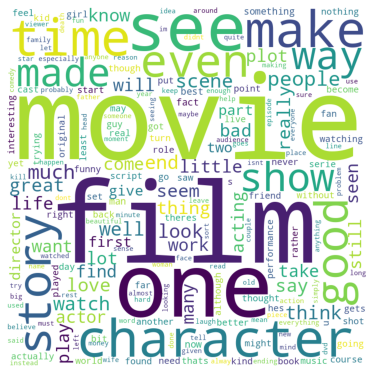

In [51]:
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

In [52]:
text = ""

for x in data[data["sentiment"] == "positive"].clean_review.values:
    text+=x

    
wc_p = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)

for x in data[data["sentiment"] == "negative"].clean_review.values:
    text+=x

    
wc_n = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)


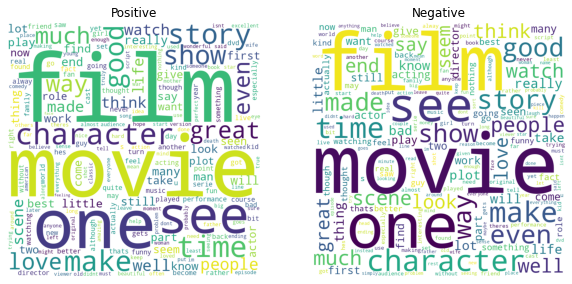

In [56]:
plt.figure(figsize = (10, 5), facecolor = None)
plt.subplot(1,2,1)
plt.imshow(wc_p)
plt.title("Positive")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wc_n)
plt.title("Negative")
plt.axis("off")
plt.show()

In [59]:
text = ""

for x in data[data["sentiment"] == "positive"].clean_review.values:
    text+=x
len(set(text.split(" ")))

151429

In [58]:
X= data["clean_review"]
y= data["sentiment"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)


In [68]:
cv = CountVectorizer(ngram_range=(1,3),stop_words="english")
X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)


In [69]:
model = GridSearchCV(MultinomialNB(),param_grid={
    "alpha" : [0.001,.01,.1,1,10,100]
})
model.fit(X_train_vec,y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [70]:
model.best_params_

{'alpha': 1}

In [71]:
model.score(X_test_vec,y_test)

0.8811333333333333